In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 150)
%matplotlib inline

In [2]:
df1 = pd.read_csv('../../datasets_preprocessed/one_hot_encoded_var.zip')

In [3]:
df1.head() 

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
df2 = pd.read_csv('../../datasets_preprocessed/one_hot_encoded_corr.zip')

In [5]:
df2.head()

,class_e,class_p,bruises_f,bruises_t,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


# First dataset

In [6]:
X = df1.drop(['class_e', 'class_p'], axis=1)
y = df1['class_p']

In [7]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 107), (1625, 107), (6499,), (1625,))

## Decision tree

### Model with standard parameters

In [11]:
model_tree = DecisionTreeClassifier()

In [12]:
model_tree.fit(X_train, y_train)
print('Decision tree train acc:', model_tree.score(X_train, y_train))
print('Decision tree test acc:', model_tree.score(X_test, y_test))

Decision tree train acc: 1.0
Decision tree test acc: 1.0


###### Train and test accuracy equals 1.0. No need for search for best parameters.

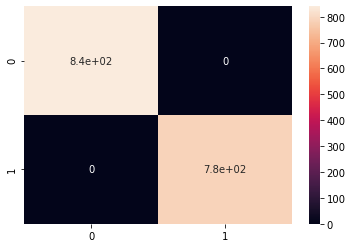

In [13]:
cm = confusion_matrix(y_test, model_tree.predict(X_test))
sns.heatmap(cm, annot=True)
plt.show();

## Random forest

### Model with standard parameters

In [14]:
model_forest = RandomForestClassifier()

In [15]:
model_forest.fit(X_train, y_train)
print('Random forest train acc:', model_forest.score(X_train, y_train))
print('Random forest test acc:', model_forest.score(X_test, y_test))

Random forest train acc: 1.0
Random forest test acc: 1.0


###### Train and test accuracy equals 1.0. No need for search for better parameters.

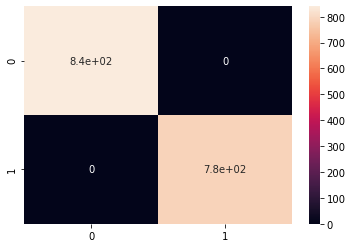

In [16]:
cm = confusion_matrix(y_test, model_forest.predict(X_test))
sns.heatmap(cm, annot=True)
plt.show();

## Prediction using decision tree

### Sample from test set

In [17]:
def shroom_check(sample, prediction: int, df):
    """
    Function checks if prediction was consistent with the class value from original dataframe.
    """
    
    ix = sample.index[0]
    row_ix = df[df.columns[2:]].iloc[ix:ix+1]
    result = prediction == df.iloc[ix]['class_p']

    return result

In [18]:
s_test = X_test.sample()
s_test

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
658,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [19]:
s_test.index[:]

Int64Index([658], dtype='int64')

In [20]:
prediction = int(model_tree.predict(s_test))
prediction

0

In [21]:
shroom_check(s_test, prediction, df1)

True

#### Checking for 100 records

In [22]:
def test_prediction(n: int, df, model):
    """
    Function gives results for n iteration of prediction from random samples from dataset.
    """
    
    correct_values = 0
    i = 0
    X = df.copy(deep=False)
    
    for col in X.columns:
        if 'class' in col:
            X.drop(col, axis=1, inplace=True)
    
    while i < n:
        sample = X.sample()
        prediction = int(model.predict(sample))
        check = shroom_check(sample, prediction, df)
    
        if check == True:
            correct_values += 1
        
        i += 1

    print(f'True predictions: {correct_values} ({100 * correct_values / n}%)')
    print(f'False predictions: {n - correct_values} ({100 - 100 * correct_values / n}%)')

In [23]:
test_prediction(100, df1, model_tree)

True predictions: 100 (100.0%)
False predictions: 0 (0.0%)


#### Testing behaviour of the model when user does not give all of the values

In [24]:
def get_features(df):
    columns_original = set()
    
    for column in df.columns:
        if column[:-2] in ['class']:
            continue
        columns_original.add(column[:-2])
    
    return list(columns_original)

In [25]:
def get_random_features(df, n_randoms: int):
    """
    Function creates a set with randomly chosen features from dataset.
    """
    
    columns_original = get_features(df)
    
    random_columns = set()
    
    for i in range(n_randoms):
        random_column = columns_original[np.random.randint(0, len(columns_original))]
        random_columns.add(random_column)
        columns_original.remove(random_column)
    
    return random_columns

In [26]:
def copy_df_with_nan_values(df, columns_to_nan = set(), filler = -1):
    """
    Function returns a copy from dataset with n features filled with filler.
    The filler value is set to default as -1.
    """
    
    df_copy = df.copy()
    
    for column in df_copy.columns:
        if column[:-2] in columns_to_nan:
            df_copy[column] = np.NaN
     
    df_copy.fillna(filler, inplace=True)
    
    return df_copy

###### Checking predictions

Checking for 1000 samples on 5 'NaN' features

In [27]:
random_cols = get_random_features(df1, 5)
print(f'Removed columns: {random_cols}')
g = copy_df_with_nan_values(df1, random_cols)
test_prediction(1000, g, model_tree)

Removed columns: {'habitat', 'stalk-root', 'stalk-surface-above-ring', 'gill-color', 'population'}
True predictions: 993 (99.3%)
False predictions: 7 (0.7000000000000028%)


Testing samples without single column

In [28]:
for col in get_features(df1):
    print(f'Results for {col}')
    g = copy_df_with_nan_values(df1, set([col]))
    test_prediction(1000, g, model_tree)
    print('\n')

Results for ring-type
True predictions: 1000 (100.0%)
False predictions: 0 (0.0%)


Results for population
True predictions: 999 (99.9%)
False predictions: 1 (0.09999999999999432%)


Results for habitat
True predictions: 1000 (100.0%)
False predictions: 0 (0.0%)


Results for spore-print-color
True predictions: 993 (99.3%)
False predictions: 7 (0.7000000000000028%)


Results for cap-surface
True predictions: 1000 (100.0%)
False predictions: 0 (0.0%)


Results for cap-color
True predictions: 1000 (100.0%)
False predictions: 0 (0.0%)


Results for stalk-root
True predictions: 995 (99.5%)
False predictions: 5 (0.5%)


Results for gill-color
True predictions: 1000 (100.0%)
False predictions: 0 (0.0%)


Results for stalk-surface-above-ring
True predictions: 941 (94.1%)
False predictions: 59 (5.900000000000006%)


Results for odor
True predictions: 573 (57.3%)
False predictions: 427 (42.7%)


Results for gill-spacing
True predictions: 1000 (100.0%)
False predictions: 0 (0.0%)


Results for s

# Script testing

In [29]:
import sys

sys.path.append('../..')

In [30]:
import scoring as sc

In [31]:
mh = sc.ModelHandler(model_tree, df1)
mh

In [32]:
mh.predict_for_user_input({'odor': 'l'})

Model score on 2000 samples: 0.9895


{'accuracy': 0.9895, 'poisonous': 0}

In [33]:
mh.predict_for_user_input({'odor': 'n'})

Model score on 2000 samples: 0.9845


{'accuracy': 0.9845, 'poisonous': 0}

In [34]:
mh.get_features()

['ring-type',
 'population',
 'habitat',
 'spore-print-color',
 'cap-surface',
 'cap-color',
 'stalk-root',
 'gill-color',
 'stalk-surface-above-ring',
 'odor',
 'gill-spacing',
 'stalk-surface-below-ring',
 'gill-size',
 'stalk-color-below-ring',
 'stalk-shape',
 'cap-shape',
 'stalk-color-above-ring',
 'bruises']

In [35]:
test_model = sc.TestModel(model_tree, df1)
test_model

In [36]:
test_model.test_predictions()

Model score on 100 samples: 1.0


1.0

In [37]:
test_model.test_predictions(n=848)

Model score on 848 samples: 1.0


1.0

In [38]:
test_model.copy_df_with_nan_values(columns_to_nan={'cap-shape', 'stalk-root'}).head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
test_model.test_for_empty_feature()

Results for ring-type
Model score on 100 samples: 1.0


Results for population
Model score on 100 samples: 1.0


Results for habitat
Model score on 100 samples: 1.0


Results for spore-print-color
Model score on 100 samples: 1.0


Results for cap-surface
Model score on 100 samples: 1.0


Results for cap-color
Model score on 100 samples: 1.0


Results for stalk-root
Model score on 100 samples: 1.0


Results for gill-color
Model score on 100 samples: 1.0


Results for stalk-surface-above-ring
Model score on 100 samples: 0.94


Results for odor
Model score on 100 samples: 0.59


Results for gill-spacing
Model score on 100 samples: 1.0


Results for stalk-surface-below-ring
Model score on 100 samples: 1.0


Results for gill-size
Model score on 100 samples: 1.0


Results for stalk-color-below-ring
Model score on 100 samples: 1.0


Results for stalk-shape
Model score on 100 samples: 1.0


Results for cap-shape
Model score on 100 samples: 1.0


Results for stalk-color-above-ring
Model score o

In [40]:
test_model.test_for_empty_feature(8000)

Results for ring-type
Model score on 8000 samples: 1.0


Results for population
Model score on 8000 samples: 0.99975


Results for habitat
Model score on 8000 samples: 1.0


Results for spore-print-color
Model score on 8000 samples: 0.99125


Results for cap-surface
Model score on 8000 samples: 1.0


Results for cap-color
Model score on 8000 samples: 1.0


Results for stalk-root
Model score on 8000 samples: 0.9955


Results for gill-color
Model score on 8000 samples: 1.0


Results for stalk-surface-above-ring
Model score on 8000 samples: 0.936625


Results for odor
Model score on 8000 samples: 0.5675


Results for gill-spacing
Model score on 8000 samples: 1.0


Results for stalk-surface-below-ring
Model score on 8000 samples: 0.99625


Results for gill-size
Model score on 8000 samples: 0.997625


Results for stalk-color-below-ring
Model score on 8000 samples: 1.0


Results for stalk-shape
Model score on 8000 samples: 1.0


Results for cap-shape
Model score on 8000 samples: 1.0


Result

Using created object and its method is much faster in execution (than doing so in a loop), therefore it was possible to test model's behaviour with one 'NaN' column on a large sample.\
Features that have an impact on model's predictions are:
- 'odor' - accuracy almost halved,
- 'gill-size' - second to the most significant odor (accuracy ~75% with missing knowledge about this one),
- 'bruises' - about 10% drop in accuracy, seems to be quite important as well,
- other less important (but still showing some importance) - 'spore-print-color', 'stalk-surface-below-ring', 'stalk-root' - those have about 99% accuracy

In [41]:
rand_feat = test_model.get_random_features(5)
rand_feat

{'cap-shape',
 'gill-size',
 'gill-spacing',
 'population',
 'stalk-color-below-ring'}

In [42]:
test_model.copy_df_with_nan_values(columns_to_nan=rand_feat).head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0
1,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0
2,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1,0,0,0
3,0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0
4,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0


In [43]:
test_model.test_for_missing_m_features(8, 2000)

Removed features: {'bruises', 'spore-print-color', 'cap-color', 'stalk-surface-above-ring', 'stalk-color-below-ring', 'cap-shape', 'stalk-color-above-ring', 'population'}
Model score on 2000 samples: 0.9275


In [44]:
for i in range(2, 16):
    for j in range(5):
        print(f'Try {j} for {i} features.')
        test_model.test_for_missing_m_features(i, 2000)
        print('\n')

Try 0 for 2 features.
Removed features: {'gill-size', 'population'}
Model score on 2000 samples: 0.998


Try 1 for 2 features.
Removed features: {'odor', 'gill-size'}
Model score on 2000 samples: 0.5675


Try 2 for 2 features.
Removed features: {'habitat', 'cap-surface'}
Model score on 2000 samples: 1.0


Try 3 for 2 features.
Removed features: {'cap-color', 'cap-surface'}
Model score on 2000 samples: 1.0


Try 4 for 2 features.
Removed features: {'population', 'bruises'}
Model score on 2000 samples: 1.0


Try 0 for 3 features.
Removed features: {'odor', 'cap-color', 'population'}
Model score on 2000 samples: 0.5885


Try 1 for 3 features.
Removed features: {'stalk-color-below-ring', 'gill-color', 'population'}
Model score on 2000 samples: 0.9995


Try 2 for 3 features.
Removed features: {'stalk-shape', 'stalk-root', 'stalk-color-above-ring'}
Model score on 2000 samples: 0.994


Try 3 for 3 features.
Removed features: {'ring-type', 'habitat', 'gill-size'}
Model score on 2000 samples: 0

Model score on 2000 samples: 0.9935


Try 2 for 11 features.
Removed features: {'ring-type', 'cap-surface', 'cap-color', 'odor', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-below-ring', 'stalk-shape', 'cap-shape', 'stalk-color-above-ring', 'population'}
Model score on 2000 samples: 0.531


Try 3 for 11 features.
Removed features: {'ring-type', 'habitat', 'spore-print-color', 'cap-surface', 'cap-color', 'stalk-surface-above-ring', 'gill-spacing', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'bruises'}
Model score on 2000 samples: 0.9205


Try 4 for 11 features.
Removed features: {'habitat', 'bruises', 'cap-color', 'stalk-root', 'gill-color', 'stalk-surface-above-ring', 'gill-spacing', 'stalk-color-below-ring', 'stalk-shape', 'cap-shape', 'cap-surface'}
Model score on 2000 samples: 0.996


Try 0 for 12 features.
Removed features: {'ring-type', 'habitat', 'bruises', 'spore-print-color', 'cap-color', 'stalk-surface-above-ring', 'odor', 'gill-spacing', 'stalk

It is actually possible to keep model's accuracy on 100% giving it sample with up to 4-5 missing values. Although every time one (or more) of most significant mushroom data is missing the accuracy drops rapidly as well. Nevertheless the model can keep its accuracy at ~90% (or more) with even more missing data, the only condition being given data of 'odor', 'gill-size' and 'bruises'.

## Prediction using random forest

In [45]:
test_model = sc.TestModel(model_forest, df1)
test_model

In [46]:
test_model.test_for_empty_feature(8000)

Results for ring-type
Model score on 8000 samples: 1.0


Results for population
Model score on 8000 samples: 1.0


Results for habitat
Model score on 8000 samples: 1.0


Results for spore-print-color
Model score on 8000 samples: 1.0


Results for cap-surface
Model score on 8000 samples: 1.0


Results for cap-color
Model score on 8000 samples: 1.0


Results for stalk-root
Model score on 8000 samples: 1.0


Results for gill-color
Model score on 8000 samples: 1.0


Results for stalk-surface-above-ring
Model score on 8000 samples: 1.0


Results for odor
Model score on 8000 samples: 0.998125


Results for gill-spacing
Model score on 8000 samples: 1.0


Results for stalk-surface-below-ring
Model score on 8000 samples: 1.0


Results for gill-size
Model score on 8000 samples: 1.0


Results for stalk-color-below-ring
Model score on 8000 samples: 1.0


Results for stalk-shape
Model score on 8000 samples: 1.0


Results for cap-shape
Model score on 8000 samples: 1.0


Results for stalk-color-above

The random forest is much more efficient than decision tree given a sample with one missing feature. The accuracy doesn't drop even if data about the most significant features is missing.

In [47]:
rand_feat = test_model.get_random_features(5)
rand_feat

{'bruises', 'cap-color', 'gill-color', 'gill-spacing', 'stalk-shape'}

In [48]:
for i in range(2, 16):
    for j in range(5):
        print(f'Try {j} for {i} features.')
        test_model.test_for_missing_m_features(i, 2000)
        print('\n')

Try 0 for 2 features.
Removed features: {'gill-spacing', 'habitat'}
Model score on 2000 samples: 1.0


Try 1 for 2 features.
Removed features: {'ring-type', 'gill-size'}
Model score on 2000 samples: 1.0


Try 2 for 2 features.
Removed features: {'odor', 'habitat'}
Model score on 2000 samples: 0.9915


Try 3 for 2 features.
Removed features: {'ring-type', 'spore-print-color'}
Model score on 2000 samples: 1.0


Try 4 for 2 features.
Removed features: {'stalk-surface-above-ring', 'cap-surface'}
Model score on 2000 samples: 1.0


Try 0 for 3 features.
Removed features: {'cap-surface', 'spore-print-color', 'bruises'}
Model score on 2000 samples: 0.999


Try 1 for 3 features.
Removed features: {'odor', 'spore-print-color', 'cap-surface'}
Model score on 2000 samples: 0.952


Try 2 for 3 features.
Removed features: {'ring-type', 'gill-spacing', 'stalk-color-above-ring'}
Model score on 2000 samples: 1.0


Try 3 for 3 features.
Removed features: {'stalk-shape', 'stalk-root', 'spore-print-color'}

Model score on 2000 samples: 0.985


Try 2 for 11 features.
Removed features: {'ring-type', 'spore-print-color', 'cap-surface', 'stalk-root', 'gill-color', 'stalk-surface-above-ring', 'gill-spacing', 'odor', 'gill-size', 'stalk-color-below-ring', 'bruises'}
Model score on 2000 samples: 0.599


Try 3 for 11 features.
Removed features: {'ring-type', 'habitat', 'bruises', 'cap-color', 'gill-spacing', 'odor', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-below-ring', 'cap-shape', 'cap-surface'}
Model score on 2000 samples: 0.852


Try 4 for 11 features.
Removed features: {'ring-type', 'population', 'habitat', 'bruises', 'cap-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-shape', 'cap-shape', 'stalk-color-above-ring', 'cap-surface'}
Model score on 2000 samples: 0.984


Try 0 for 12 features.
Removed features: {'population', 'bruises', 'habitat', 'spore-print-color', 'stalk-root', 'gill-color', 'odor', 'stalk-surface-below-ring', 'gill-size', 'stalk-shape', 'cap-shape', 'ca

The random forest model behaaves much better than decision tree with more than one missing feature. 'odor', 'gill-size' and 'bruises' still impact accuracy but it doesn't drop as quickly. Up to 7-8 missing features model's accuracy stays at the 90% level or more.

# Model serialization

In [49]:
mh_rf = sc.ModelHandler(model_forest, df1)
filename = 'random_forest.pkl'
sc.pickle_model(mh_rf, filename)

In [50]:
sc.load_model(filename)